xvector_dvector_inspection 
------------------------

session끼리는 얼마나 모여있나..


### Environment

In [1]:
%load_ext autoreload
%autoreload 2
%pylab
%matplotlib inline
    
import pandas as pd
import pickle
import numpy as np
import sys
import os


Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


In [2]:
sys.path.append('/host/projects/sv_experiments/')
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"]="3"

In [3]:
def key2df(keys, delimeter="-"):
    key_df = pd.DataFrame(keys, columns=['key'])
    key_df['spk'] = key_df.key.apply(lambda x: x.split(delimeter)[0])
    key_df['label'] = key_df.groupby('spk').ngroup()
    key_df['origin'] = key_df.spk.apply(lambda x: 'voxc2' if x.startswith('id') else 'voxc1')
    
    return key_df

In [49]:
from MulticoreTSNE import MulticoreTSNE as TSNE
import matplotlib.cm as cm

def run_tsne(sv_key_df, sv_embeds, title, n_class = 40):
    sv_all_spks = sv_key_df.spk.unique().tolist()
    
    tsne_spks = np.random.choice(sv_all_spks, size=n_class, replace=False)
    spk2label = {k:i for i, k in enumerate(tsne_spks)}

    tsne_df = sv_key_df[sv_key_df.spk.isin(tsne_spks)]
    tsne_embeds = sv_embeds[tsne_df.index]

    X_embedded = TSNE(n_components=2).fit_transform(tsne_embeds)

    colors = cm.rainbow_r(np.linspace(0, 1, n_class))
    c_label = tsne_df.spk.apply(lambda x: tsne_spks.tolist().index(x))

    fig = plt.figure(figsize=(10,10))
    for spk in tsne_spks:
        X = X_embedded[tsne_df[tsne_df.spk == spk].index]
        plt.scatter(X[:,0], X[:,1], c=colors[tsne_spks.tolist().index(spk)] )
    plt.legend(['s{}'.format(i) for i in range(len(tsne_spks))], loc=2, bbox_to_anchor=(1.05, 1), borderaxespad=0., fontsize=11)
    plt.title(title)
    
    return fig

## TSNE

### Pytorch voxc12 x-vector

이건 fbank_xvector로 트레이닝 한다음 fbank로 뽑은 것이라

정확한 결과는 아니다.

In [8]:
sv_keys = pickle.load(open("../../sv_system/embeddings/voxc1/voxc1_mfcc30_best/sv_keys.pkl", "rb"))
sv_embeds = np.load("../../sv_system/embeddings/voxc1/voxc1_mfcc30_best/sv_embeds.npy")

In [9]:
sv_key_df = key2df(sv_keys, delimeter='-')

In [11]:
sv_key_df.head(5)

,key,spk,label,origin
0,id10300-7byARrJfhlI-00001,id10300,30,voxc2
1,id10300-8EDKH42GZ1o-00028,id10300,30,voxc2
2,id10300-fAe7DXqrZls-00010,id10300,30,voxc2
3,id10300-7byARrJfhlI-00007,id10300,30,voxc2
4,id10300-hgnrRWnvraY-00001,id10300,30,voxc2


In [13]:
sv_key_df['session'] = sv_key_df.key.apply(lambda x: x[8:-6])

In [14]:
target_spk = sv_key_df.spk.unique().tolist()[0]

In [16]:
target_sessions = sv_key_df[sv_key_df.spk == target_spk].session.unique()

In [22]:
n_class = len(target_sessions)

In [19]:
sess2label = {k:i for i, k in enumerate(target_sessions)}

tsne_df = sv_key_df[sv_key_df.session.isin(target_sessions)]
tsne_embeds = sv_embeds[tsne_df.index]

In [21]:
from MulticoreTSNE import MulticoreTSNE as TSNE
X_embedded = TSNE(n_components=2).fit_transform(tsne_embeds)

Text(0.5,1,'<function title at 0x7f56fc104400>')

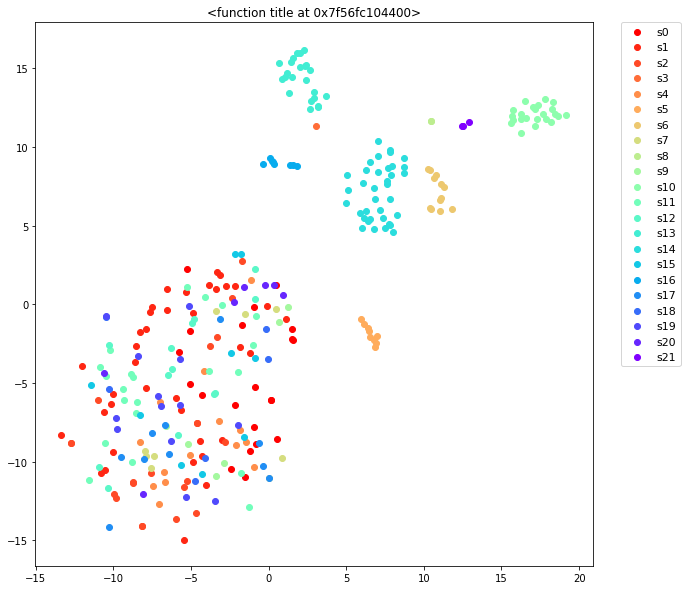

In [25]:
import matplotlib.cm as cm
colors = cm.rainbow_r(np.linspace(0, 1, n_class))
c_label = tsne_df.session.apply(lambda x: target_sessions.tolist().index(x))

fig = plt.figure(figsize=(10,10))
for sess in target_sessions:
    X = X_embedded[tsne_df[tsne_df.session == sess].index]
    plt.scatter(X[:,0], X[:,1], c=colors[target_sessions.tolist().index(sess)] )
plt.legend(['s{}'.format(i) for i in range(n_class)], loc=2, bbox_to_anchor=(1.05, 1), borderaxespad=0., fontsize=11)
plt.title(title)